# Understanding SHAP values 

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


### Import libraries

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import plotly
np.random.seed(0)
import matplotlib.pyplot as plt
import shap

### Read dataset

In [2]:
df = pd.read_csv('winequality-red.csv') # ,sep=';')

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns
df['quality'] = df['quality'].astype(int)

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Target variable is quality of the wine

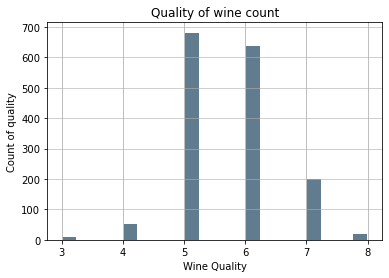

In [6]:
df['quality'].hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Quality of wine count')
plt.xlabel('Wine Quality')
plt.ylabel('Count of quality')
plt.grid(axis='y', alpha=0.75)

### Implement Random Forest regressor

In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor

#target variable
Y = df['quality']

# Independent variables
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [8]:
# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [9]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)

# Fit the model
model.fit(X_train, Y_train)  
print(model.feature_importances_)

[0.02771784 0.14608857 0.0098873  0.03979135 0.03834853 0.02349039
 0.07114265 0.01940386 0.04327445 0.20548462 0.37537044]


### Variable Importance Plot — Global Interpretability

### Average impact on Quality of wine

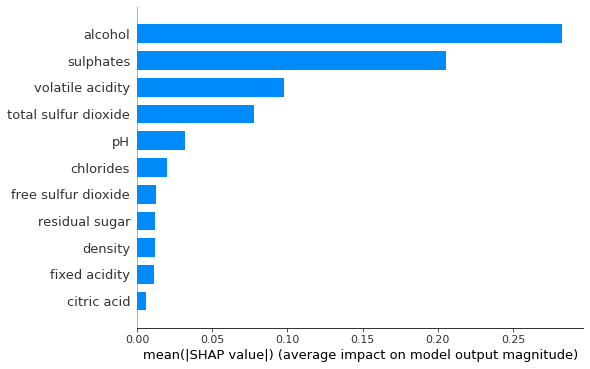

In [10]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [12]:
len(shap_values)

1279

In [13]:
shap_values.shape

(1279, 11)

In [11]:

print(f'Shape of test dataset: {X_train.shape}')
print(f'Type of shap_values: {type(shap_values)}. Length of the list: {len(shap_values)}')
print(f'Shape of shap_values: {np.array(shap_values).shape}')

Shape of test dataset: (1279, 11)
Type of shap_values: <class 'numpy.ndarray'>. Length of the list: 1279
Shape of shap_values: (1279, 11)


Can the above variable importance plot show the directions between the features and the target variable? Yes, that's the power of the Shap value plot as shown below. This plot is made of many dots. Each dot has three characteristics. The graph below plots the SHAP values of every feature for every sample. It shorts features by the total of absolute SHAP values over all samples. The color represents the feature value (red high, blue low).

The vertical location shows the feature importance.
The horizontal location shows whether the effect of that value caused a higher or lower prediction.
Color shows whether that feature was high or low for that observation

### Plot with SHAP values having impact on model output (target- wine quality)

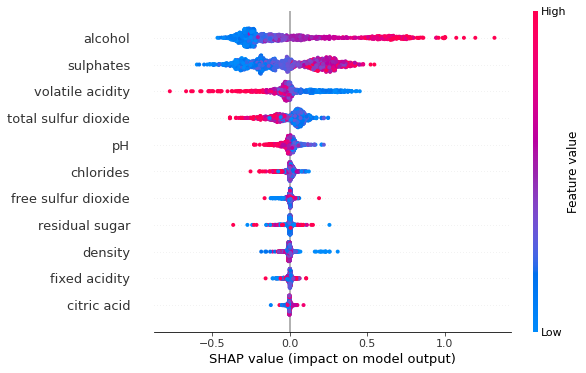

In [12]:
shap.summary_plot(shap_values, X_train)

We can describe the model. A high quality rating of wine is associated with the following characteristics:

1. High alcohol content

2. High sulphates

3. Low volatile acidity

4. Low total sulfuer dioxide

5. Low pH

6. Low chlorides

7. Low citric acid

8. Low density

9. High fixed acidity content

10. High free sulfur dioxide

11. High residual sugar

To understand how a single feature effects the output of the model we can plot the SHAP value of that feature vs. the value of the feature for all the examples in a dataset. Since SHAP values represent a feature's responsibility for a change in the model output, the plot below represents the change in predicted house price as RM (the average number of rooms per house in an area) changes. Vertical dispersion at a single value of RM represents interaction effects with other features. To help reveal these interactions dependence_plot automatically selects another feature for coloring. In this case coloring by RAD (index of accessibility to radial highways) highlights that the average number of rooms per house has less impact on home price for areas with a high RAD value.

### SHAP Dependence Plot — Global Interpretability

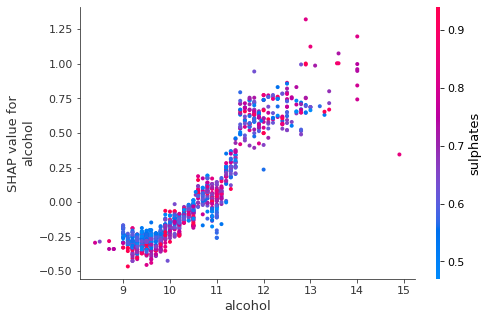

In [16]:
# the interaction is really in the model see SHAP interaction values below
shap.dependence_plot("alcohol", shap_values, X_train)

The function automatically includes another variable that your chosen variable interacts most with. The following plot shows there is an approximately linear and positive trend between “alcohol” and the target variable, and “alcohol” interacts with “sulphates” frequently.

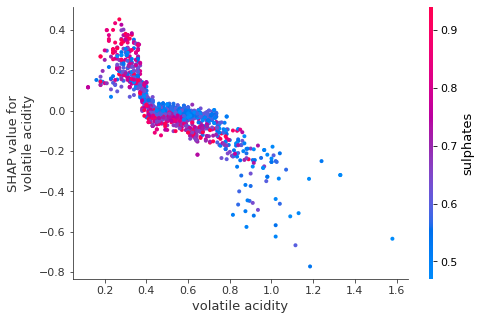

In [17]:
shap.dependence_plot("volatile acidity", shap_values, X_train)

The plot above shows there exists an approximately linear but negative relationship between “volatile acidity” and the target variable. 

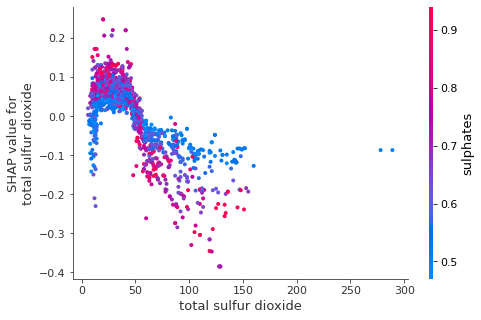

In [18]:
shap.dependence_plot("total sulfur dioxide", shap_values, X_train, show=False)
plt.show()

### SHAP values interaction for the target variable 'Quality of wine'

### Individual SHAP Value Plot — Local Interpretability

In [13]:
X_output = X_test.copy()
X_output.loc[:,'predict wine quality'] = np.round(model.predict(X_output),2)

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,predict wine quality
1032,8.1,0.820,0.00,4.1,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,4.50
34,5.2,0.320,0.25,1.8,0.103,13.0,50.0,0.99570,3.38,0.55,9.2,5.35
1508,7.1,0.270,0.60,2.1,0.074,17.0,25.0,0.99814,3.38,0.72,10.6,6.26
1479,8.2,0.280,0.60,3.0,0.104,10.0,22.0,0.99828,3.39,0.68,10.6,5.93
866,6.8,0.490,0.22,2.3,0.071,13.0,24.0,0.99438,3.41,0.83,11.3,6.33
1519,6.6,0.700,0.08,2.6,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,5.47
1193,6.4,0.885,0.00,2.3,0.166,6.0,12.0,0.99551,3.56,0.51,10.8,4.51


In [14]:
shap.initjs()

The below shap.force_plot() takes three values: the base value (explainerModel.expected_value[0]), the SHAP values (shap_values_Model[j][0]) and the matrix of feature values (S.iloc[[j]]). The base value or the expected value is the average of the model output over the training data X_train. It is the base value used in the following plot.

In [15]:
def shap_plot(j):
    # compute SHAP values
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [16]:
# mean of X train
X_train.mean()

fixed acidity            8.337373
volatile acidity         0.530000
citric acid              0.272181
residual sugar           2.553167
chlorides                0.087024
free sulfur dioxide     16.032838
total sulfur dioxide    47.114152
density                  0.996757
pH                       3.309828
sulphates                0.659077
alcohol                 10.413995
dtype: float64

In [17]:
# mean of Y test
Y_test.mean()

5.59375

In [18]:
shap_plot(1)

Output value: is the prediction for that observation

Base value: The original paper explains that the base value E(y_hat) is "the value that would be predicted if we did not know any features for the current output." In other words, it is the mean prediction, or mean(yhat). So the mean prediction of Y_test is 5.62.

Features: The above explanation shows features that contributes to push the final prediction away from the base value.

Red/blue: Those features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Alcohol: has negative impact on the quality rating. The alcohol of this wine is 9.2 which is less than the average value 10.41. So it pushes the prediction to the right.

pH: has a postive impact on the quality rating. A higher value than the average pH drives the prediction to the left.

Volatile acidity: is positively related to the quality rating. A higher value than the average volatile acidity pushes the prediction to the left.

In [25]:
shap_plot(2)

Features: The above explanation shows features that contributes to push the final prediction away from the base value.

Red/blue: Those features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

Alcohol: has negative impact on the quality rating. The alcohol of this wine is 9.2 which is less than the average value 10.41. So it pushes the prediction to the right.

pH: has a postive impact on the quality rating. A higher value than the average pH drives the prediction to the left.

Volatile acidity: is positively related to the quality rating. A higher value than the average volatile acidity pushes the prediction to the left.

In [26]:
shap_plot(3)

In [27]:
shap_plot(4)

In [28]:
fig = shap_plot(4)
fig

In [20]:
shap.force_plot(shap.TreeExplainer(model).expected_value, shap.TreeExplainer(model), S)

NameError: name 'shap_values_Model' is not defined

## The SHAP Works for Binary Target as Well

In [29]:
# Suppose the target is a binary variable
df['quality_bin'] = np.where(df['quality'].astype(int)>6,1,0)

[0.04081518 0.11412008 0.05781463 0.05653549 0.0443041  0.07081526
 0.08858322 0.04745417 0.04631266 0.1335053  0.29973991]


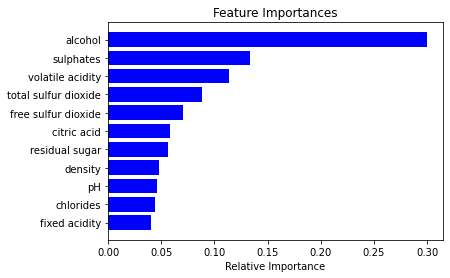

In [30]:
Y = df['quality_bin']
X =  df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [31]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

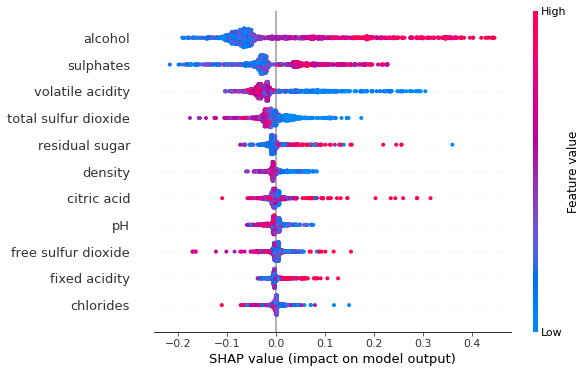

In [32]:
shap.summary_plot(shap_values, X_train)

anhy datasets, listof independ & dependent (mention) , and different dataset, run series of models